In [1]:
import pybamm
pybamm.settings.heaviside_smoothing = 10
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
#notify=Audio(url = url, autoplay = True)
notify=Audio(filename = "/home/drmrfc/Downloads/echoed-ding-459.mp3", autoplay = True)
########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

# Initial Discharge to get IC for Charge Tests

In [44]:
S8_initial = 0.5994497992432309
S6_initial = 0.014276183725582573
S4_initial = 0.009826487256660566
S2_initial = 7.236564451939587e-11
S_initial = 1.2723395454343494e-14
Sp_initial = 2.3426047241510102e-07
V_initial = 2.3999806024835673

sat = 0.000015

In [73]:
model = pybamm.lithium_sulfur.ZeroD_Chemistry_5()

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": 0.0422,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S6 ion [g]": S6_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Standard Potential L [V]": 1.89,#2.0,
        "Standard Potential M [V]": 1.95,#2.0,
        "Standard Potential H [V]": 2.35,#2.38,
        "Lower voltage cut-off [V]" : 1.9,
        "Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "S saturation mass [g]": sat
    }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = 10,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 17960#3600*hours
sim.solve([0,16950])#np.linspace(0, time_in_seconds, int(time_in_seconds/10)))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

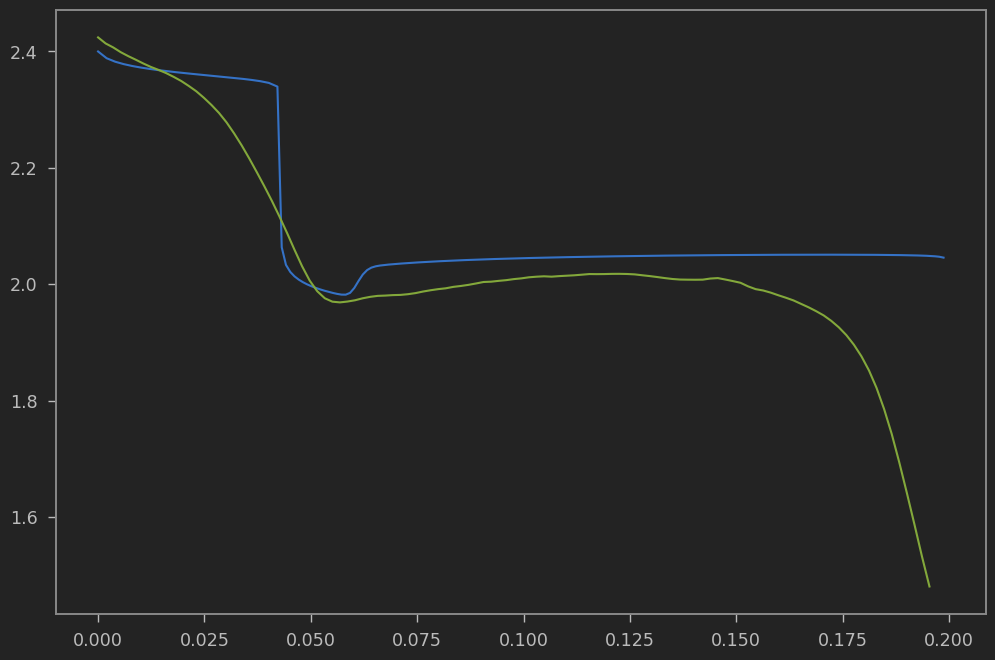

In [74]:
plt.plot(0.0422*sim.solution.t/3600, sim.solution["Terminal voltage [V]"].entries)

# get experimental data
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])

# Basic Charge Curve

In [5]:
S8_initial = sim.solution["S8 [g]"].entries[-1]
S6_initial = sim.solution["S6 [g]"].entries[-1]
S4_initial = sim.solution["S4 [g]"].entries[-1]
S2_initial = sim.solution["S2 [g]"].entries[-1]
S_initial = sim.solution["S [g]"].entries[-1]
Sp_initial = sim.solution["Precipitated Sulfur [g]"].entries[-1]
V_initial = sim.solution["Terminal voltage [V]"].entries[-1]

In [6]:
model = pybamm.lithium_sulfur.ZeroD_Chemistry_5()

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": -0.0211,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S6 ion [g]": S6_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Standard Potential L [V]": 1.9,#2.0,
        "Standard Potential M [V]": 1.95,#2.0,
        "Standard Potential H [V]": 2.35,#2.38,
        "Lower voltage cut-off [V]" : 1.9,
        "Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Precipitation rate [s-1]": 100,
        "S saturation mass [g]": sat
    }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = 10,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 200,
    ),
)
hours = 4.8
time_in_seconds = 27000#3600*hours
sim.solve(np.linspace(0, time_in_seconds, int(time_in_seconds/10)))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

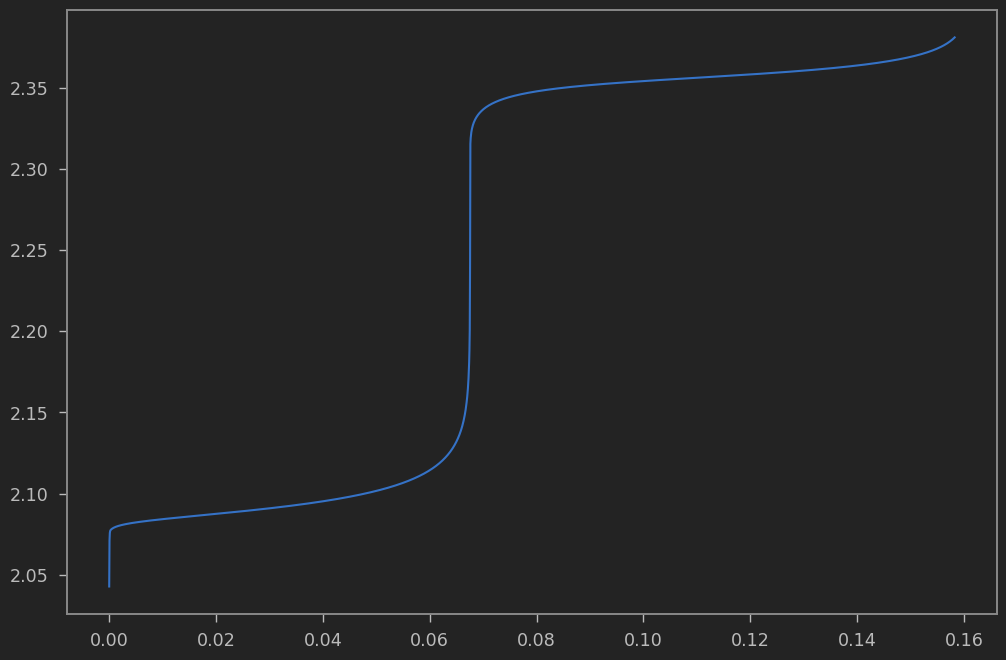

In [7]:
plt.plot(0.0211*sim.solution.t/3600, sim.solution["Terminal voltage [V]"].entries)

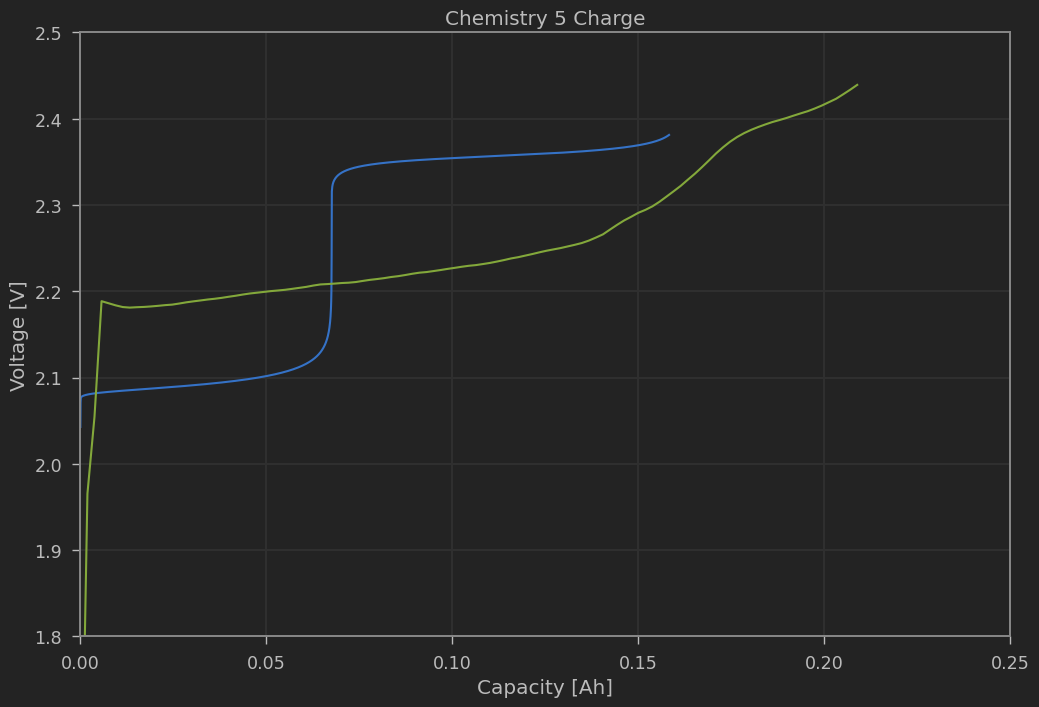

In [8]:
plt.plot(0.0211*sim.solution.t/3600, sim.solution["Terminal voltage [V]"].entries)

# get experimental data
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(charge_data['30']['capacity'],charge_data['30']['internal voltage'])

plt.ylim([1.8,2.5])
plt.xlim([0,0.25])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')
plt.title('Chemistry 5 Charge')
#plt.legend(legend)
plt.grid(True)

In [18]:
def dis_cha(sat):
    S8_initial = 0.5994497992432309
    S6_initial = 0.014276183725582573
    S4_initial = 0.009826487256660566
    S2_initial = 7.236564451939587e-11
    S_initial = 1.2723395454343494e-14
    Sp_initial = 2.3426047241510102e-07
    V_initial = 2.3999806024835673
    
    model_dis = pybamm.lithium_sulfur.ZeroD_Chemistry_5()

    param_dis = model_dis.default_parameter_values
    param_dis.update(
        {
            "Current function [A]": 0.0422,
            "Initial Condition for S8 ion [g]": S8_initial,
            "Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            "Standard Potential L [V]": 1.9,#2.0,
            "Standard Potential M [V]": 1.95,#2.0,
            "Standard Potential H [V]": 2.35,#2.38,
            "Lower voltage cut-off [V]" : 1.9,
            "Shuttle rate coefficient during discharge [s-1]": 0.0002,
            "S saturation mass [g]": sat
        }
    )


    sim_dis = pybamm.Simulation(
        model_dis,
        #experiment=experiment,
        parameter_values = param_dis,
        solver=pybamm.CasadiSolver(
            atol=1e-6,
            rtol=1e-3,
            dt_max = 10,
            #extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 15,
        ),
    )
    hours = 4.8
    time_in_seconds = 16960#3600*hours
    sim_dis.solve(np.linspace(0, time_in_seconds, int(time_in_seconds/10)))
    
    S8_initial = sim_dis.solution["S8 [g]"].entries[-1]
    S6_initial = sim_dis.solution["S6 [g]"].entries[-1]
    S4_initial = sim_dis.solution["S4 [g]"].entries[-1]
    S2_initial = sim_dis.solution["S2 [g]"].entries[-1]
    S_initial = sim_dis.solution["S [g]"].entries[-1]
    Sp_initial = sim_dis.solution["Precipitated Sulfur [g]"].entries[-1]
    V_initial = sim_dis.solution["Terminal voltage [V]"].entries[-1]
    
    model_cha = pybamm.lithium_sulfur.ZeroD_Chemistry_5()

    param_cha = model_cha.default_parameter_values
    param_cha.update(
        {
            "Current function [A]": -0.0211,
            "Initial Condition for S8 ion [g]": S8_initial,
            "Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            "Standard Potential L [V]": 1.9,#2.0,
            "Standard Potential M [V]": 1.95,#2.0,
            "Standard Potential H [V]": 2.35,#2.38,
            "Lower voltage cut-off [V]" : 1.9,
            "Shuttle rate coefficient during discharge [s-1]": 0.0002,
            "Precipitation rate [s-1]": 50,
            "S saturation mass [g]": sat
        }
    )


    sim_cha = pybamm.Simulation(
        model_cha,
        #experiment=experiment,
        parameter_values = param_cha,
        solver=pybamm.CasadiSolver(
            atol=1e-6,
            rtol=1e-3,
            dt_max = 10,
            #extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 200,
        ),
    )
    hours = 4.8
    time_in_seconds = 27000#3600*hours
    sim_cha.solve(np.linspace(0, time_in_seconds, int(time_in_seconds/10)))
    
    return sim_dis, sim_cha

In [75]:
sat_list = [ 0.00002,0.00005,0.0001]
sim_dict = {}

for sat in sat_list:
    sim_dis, sim_cha = dis_cha(sat)
    sim_dict[str(sat)] = (sim_dis, sim_cha)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.00750278 an

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.0800296 and

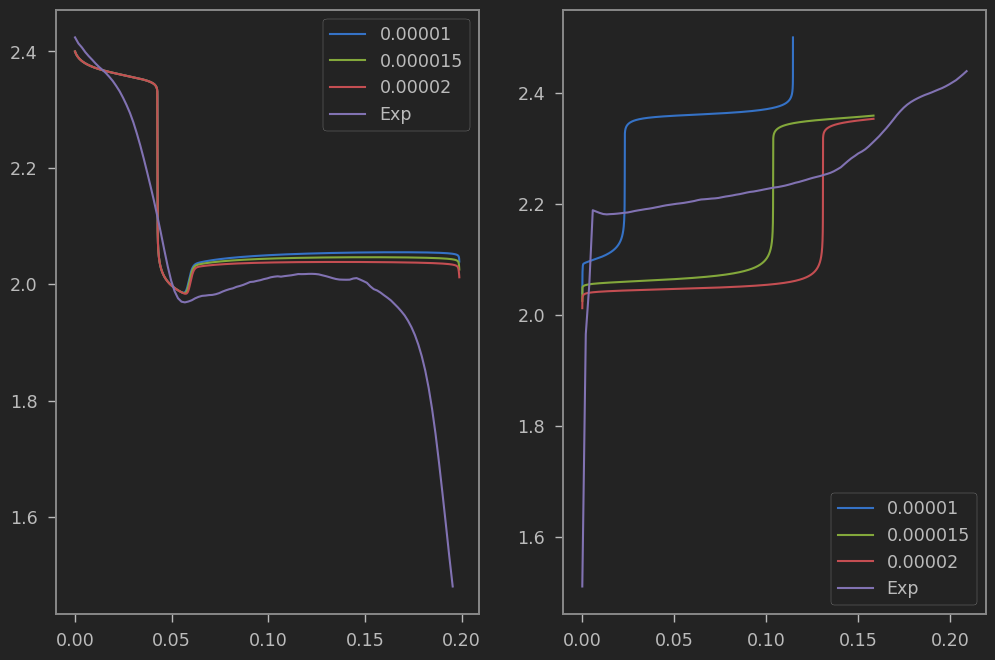

In [76]:

for sat in sat_list:
    sim_dis, sim_cha = sim_dict[str(sat)]
    plt.subplot(1,2,1)
    plt.plot(0.0422*sim_dis.solution.t/3600, sim_dis.solution["Terminal voltage [V]"].entries)
    
    plt.subplot(1,2,2)
    plt.plot(0.0211*sim_cha.solution.t/3600, sim_cha.solution["Terminal voltage [V]"].entries)
    
    

# get experimental data
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.subplot(1,2,1)
plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])
plt.legend(['0.00001', '0.000015', '0.00002', 'Exp'])

plt.subplot(1,2,2)
plt.plot(charge_data['30']['capacity'],charge_data['30']['internal voltage'])
plt.legend(['0.00001', '0.000015', '0.00002', 'Exp'])